## Imports


In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

### Lendo dataset

In [4]:
df = pd.read_csv(r'olist_products_dataset.csv')

In [5]:
df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


### Criando variável volume

In [6]:
df ['product_volume_cm'] = df['product_length_cm'] * df['product_height_cm'] * df['product_width_cm']

### Escolhendo variáveis utilizadas no modelo

In [ ]:
df2 = df[['product_weight_g','product_volume_cm']].copy()

## Identificando dados ausentes

In [37]:
df2.isnull().sum().sort_values(ascending=False).head()

product_weight_g     2
product_volume_cm    2
dtype: int64

## Tratando Dados ausentes

#### Preenchendo com a média

In [43]:
df2['product_weight_g'] = df2['product_weight_g'].fillna(df2['product_weight_g'].mean())

In [44]:
df2['product_volume_cm'] = df2['product_volume_cm'].fillna(df2['product_volume_cm'].mean())

#### Confirmando o tratamento de dados ausentes

In [45]:
df2.isnull().sum().sort_values(ascending=False).head()

product_weight_g     0
product_volume_cm    0
dtype: int64

## Método cotovelo

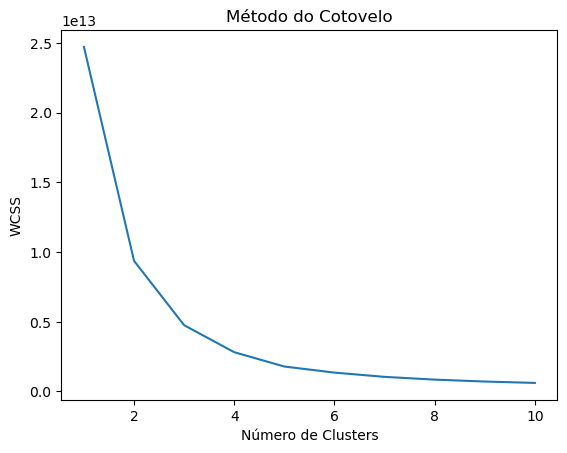

In [46]:
wcss = []
for i in range(1,11):
    kmeans = KMeans (n_clusters = i, init= 'k-means++', random_state = 7)
    kmeans.fit(df2)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

##### Utilizaremos 4 clusters

In [47]:
kmeans = KMeans(n_clusters=4,random_state=7)
y_kmeans = kmeans.fit_predict(df2)

#### Colocando os clusters no meu df

In [50]:
df2['cluster'] = y_kmeans

## vizualização

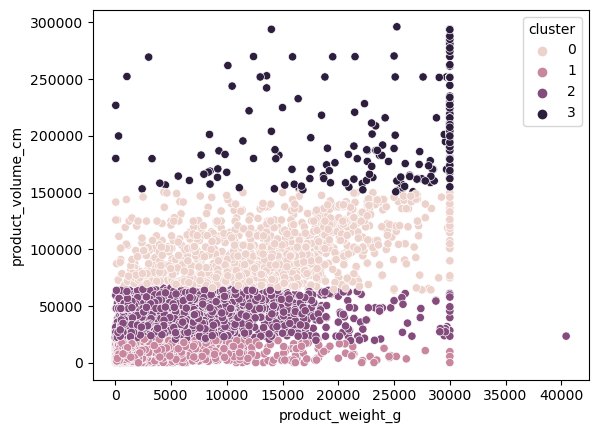

In [63]:
imagem = sns.scatterplot(data=df2, x='product_weight_g', y='product_volume_cm',hue='cluster')

In [72]:
df[['product_id','cluster']] .head(20)

,product_id,cluster
0,1e9e8ef04dbcff4541ed26657ea517e5,1
1,3aa071139cb16b67ca9e5dea641aaa2f,1
2,96bd76ec8810374ed1b65e291975717f,1
3,cef67bcfe19066a932b7673e239eb23d,1
4,9dc1a7de274444849c219cff195d0b71,1
5,41d3672d4792049fa1779bb35283ed13,1
6,732bd381ad09e530fe0a5f457d81becb,0
7,2548af3e6e77a690cf3eb6368e9ab61e,1
8,37cc742be07708b53a98702e77a21a02,1
9,8c92109888e8cdf9d66dc7e463025574,1
